## Car Price Prediction Assignment
#### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

##  Reading and Understanding the Data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#load the dataset
car_df=pd.read_csv('CarPrice_Assignment.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#cheking the shape of dataframe
car_df.shape

(205, 26)

In [4]:
#checking info
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#drop car id because it just use as a reference 
car_df=car_df.drop('car_ID',axis=1)

In [7]:
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
#extract numerical columns for pairplot
num_col = car_df.select_dtypes(exclude=['object']).columns

#### Visualising Variables

Let's make a pairplot of all the numeric variables

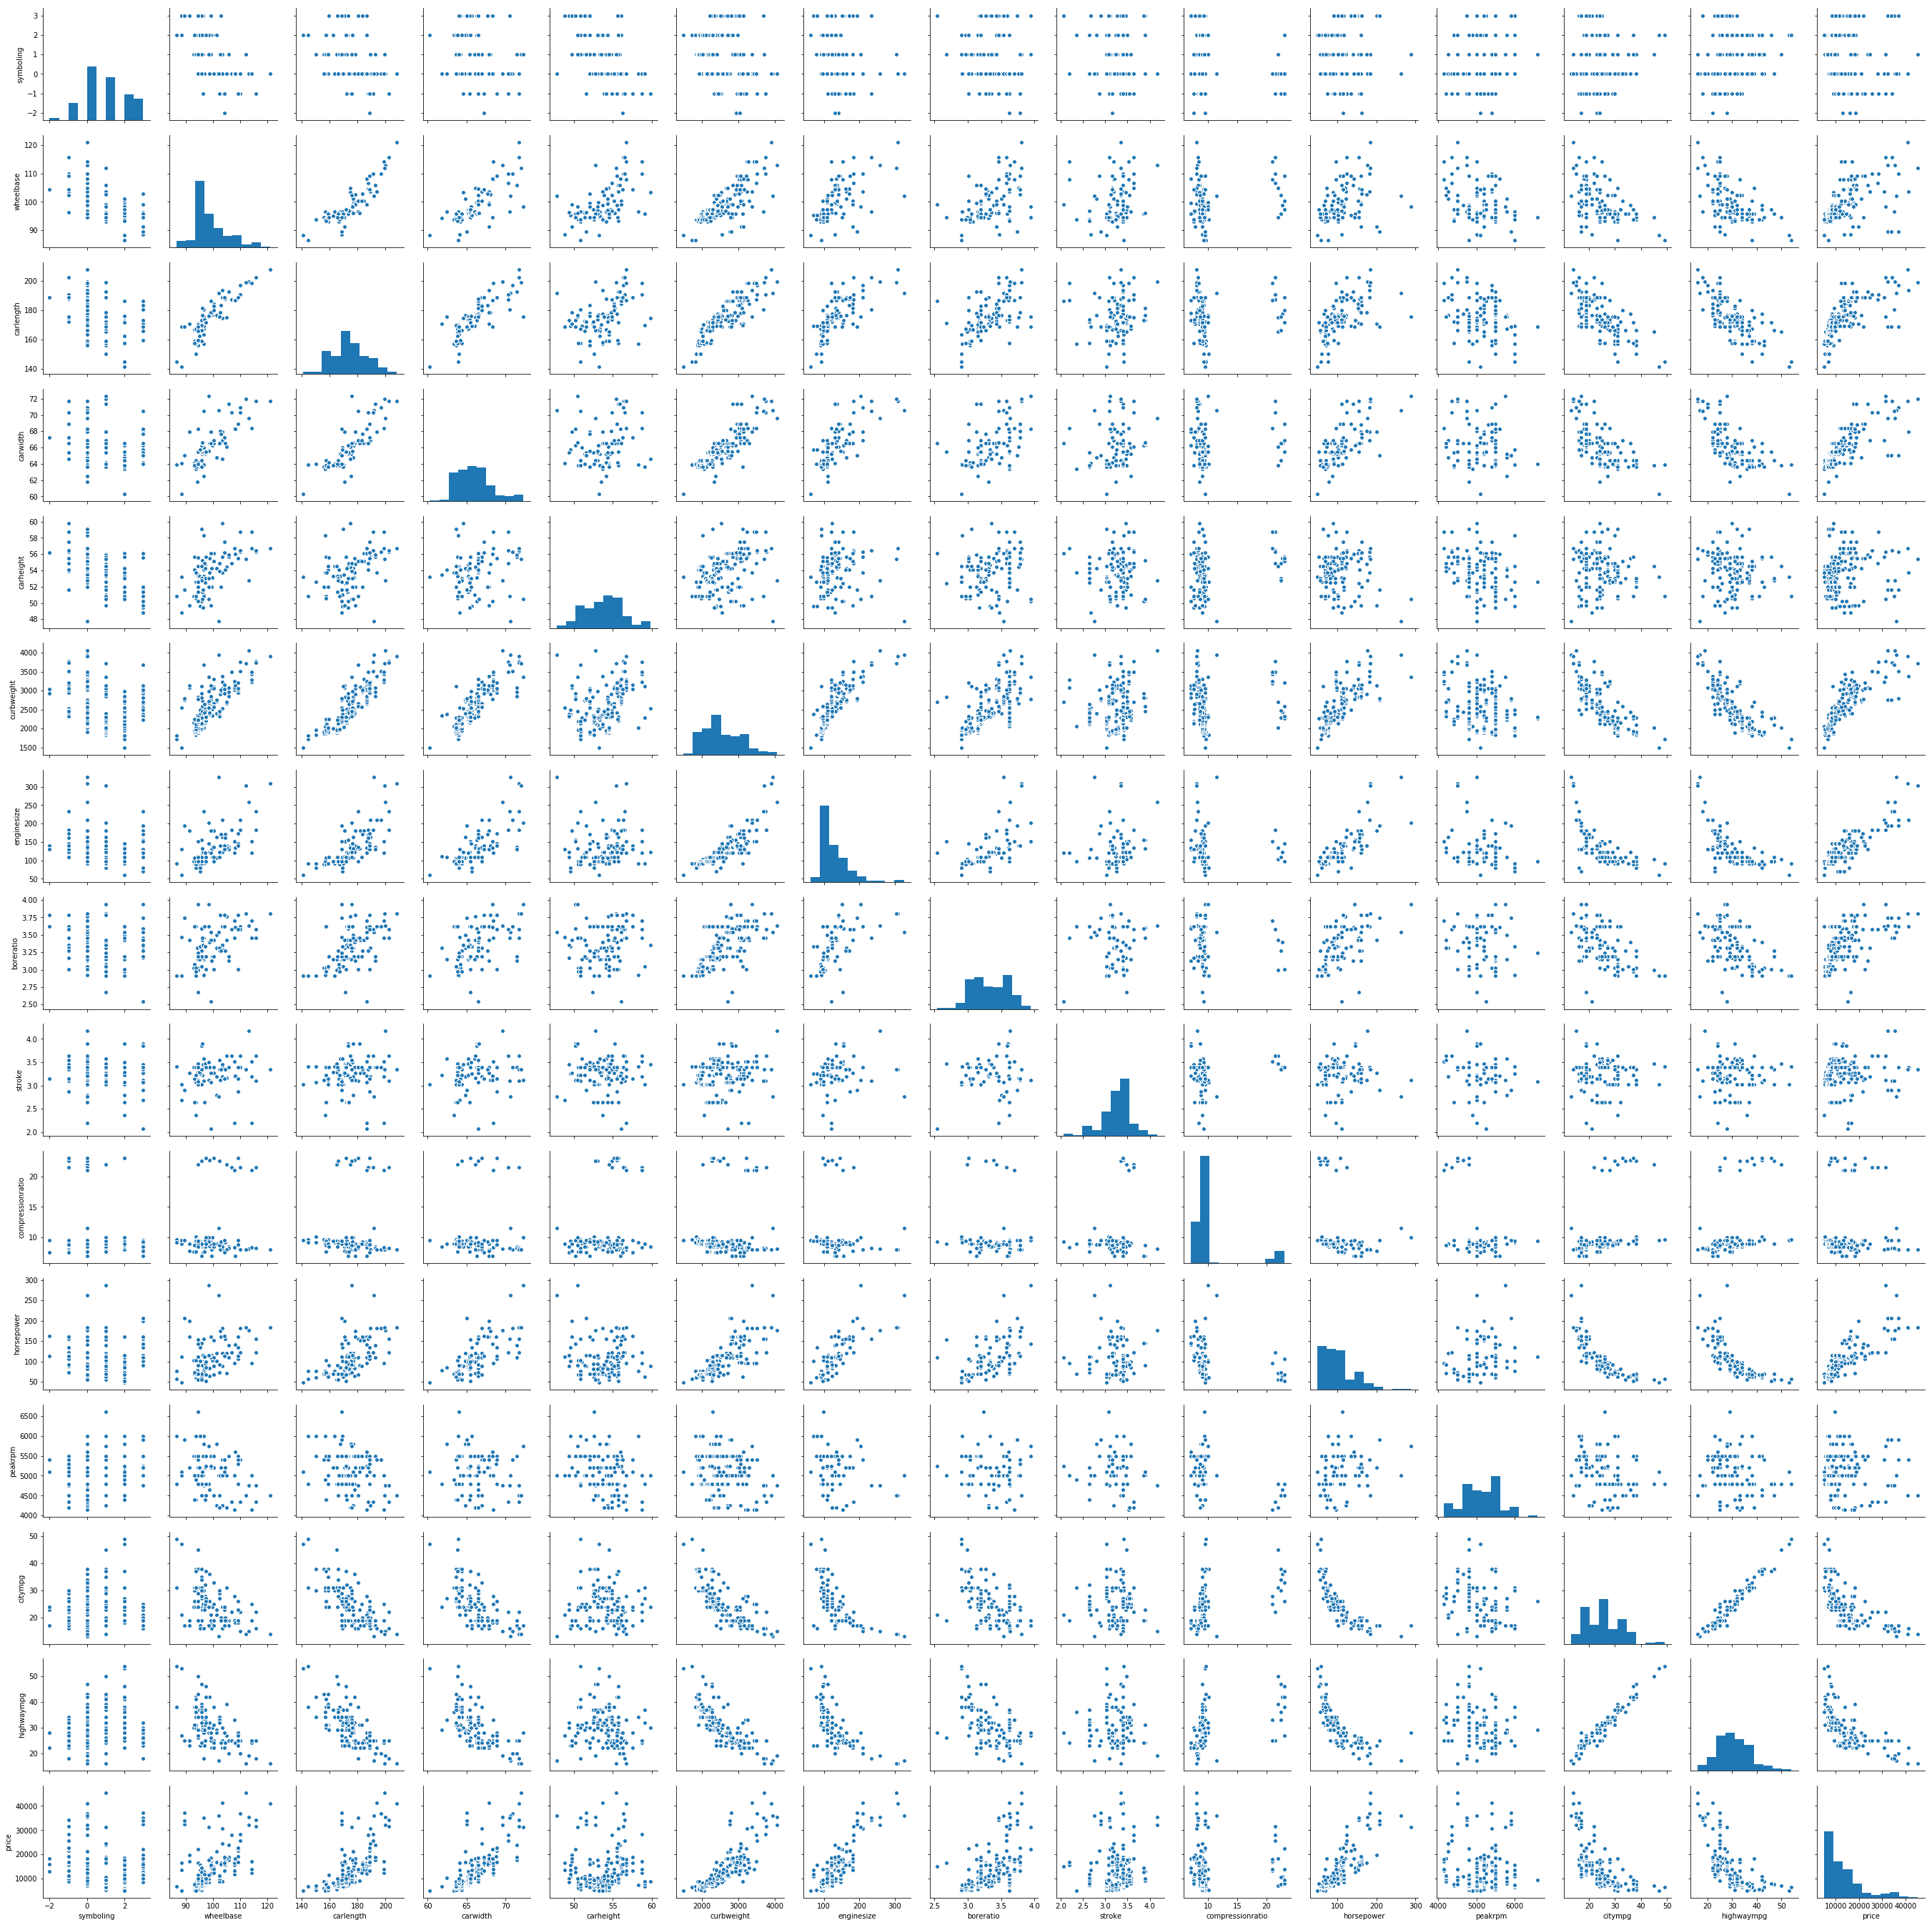

In [9]:
#visualizing the data by using pairplot
sb.pairplot(car_df[num_col]) 
plt.show()

#### There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [10]:
car_df['CarName']=car_df['CarName'].astype(str)
car_df['CarName']=car_df['CarName'].apply(lambda x:x.split(' ')[0])

In [11]:
#checking the head
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
#check unique values
car_df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
#replace misspelled words
car_df['CarName']=car_df['CarName'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota',
                           'vokswagen':'volkswagen','vw':'volkswagen'})

In [14]:
car_df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
#show head
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
#convert type of column
car_df['symboling']=car_df['symboling'].astype(str)
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg     

In [17]:
#check all the unqiue values of categorical column
print(car_df['symboling'].unique())
print(car_df['CarName'].unique())
print(car_df['fueltype'].unique())
print(car_df['aspiration'].unique())
print(car_df['doornumber'].unique())
print(car_df['carbody'].unique())
print(car_df['drivewheel'].unique())
print(car_df['enginelocation'].unique())
print(car_df['enginetype'].unique())
print(car_df['cylindernumber'].unique())
print(car_df['fuelsystem'].unique())

['3' '1' '2' '0' '-1' '-2']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


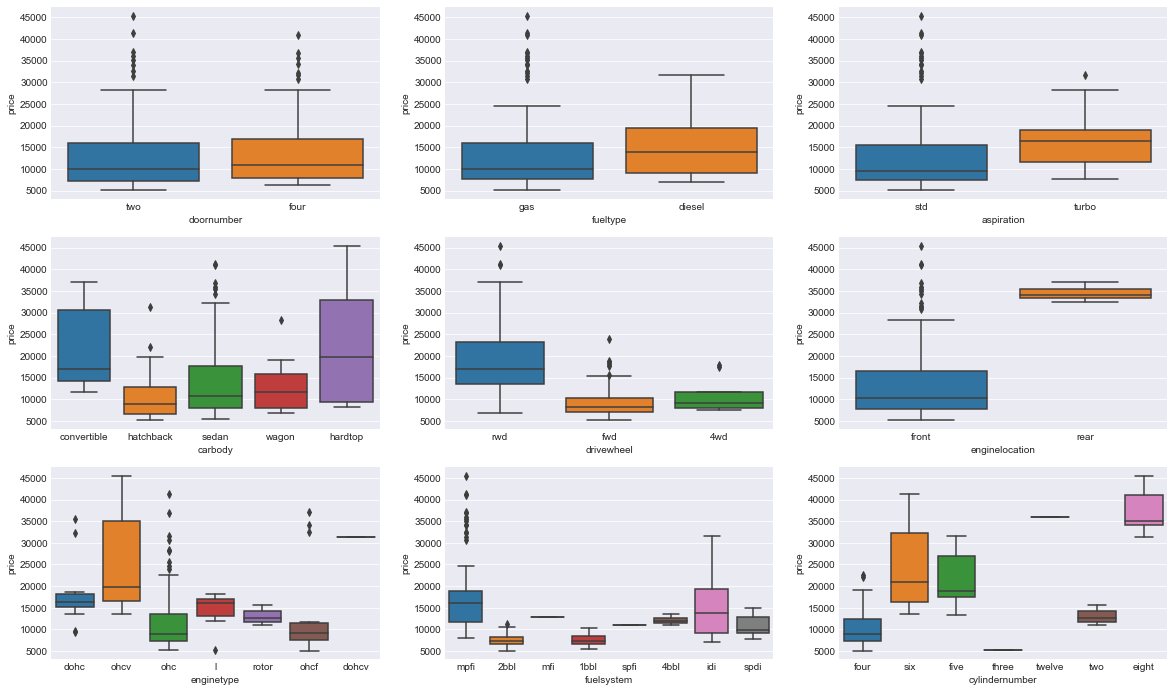

In [18]:
#visualizing the categorical variables
sb.set_style('darkgrid')
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sb.boxplot(x='doornumber',y='price',data=car_df)
plt.subplot(3,3,2)
sb.boxplot(x='fueltype',y='price',data=car_df)
plt.subplot(3,3,3)
sb.boxplot(x='aspiration',y='price',data=car_df)
plt.subplot(3,3,4)
sb.boxplot(x='carbody',y='price',data=car_df)
plt.subplot(3,3,5)
sb.boxplot(x='drivewheel',y='price',data=car_df)
plt.subplot(3,3,6)
sb.boxplot(x='enginelocation',y='price',data=car_df)
plt.subplot(3,3,7)
sb.boxplot(x='enginetype',y='price',data=car_df)
plt.subplot(3,3,8)
sb.boxplot(x='fuelsystem',y='price',data=car_df)
plt.subplot(3,3,9)
sb.boxplot(x='cylindernumber',y='price',data=car_df)
plt.show()

#### 1. Diesel Cars has comparatively more car prices than gas car 2. turbo aspiration has more prices 3. hardtop and convertible carbody has higher prices than others 3. rwd has higher avg. prices 4. Rear enginelocation has very high price comparitively with front location 5. prices are affected by numbers of cylindernumber 5. doornumbers dont affect the prices of a car

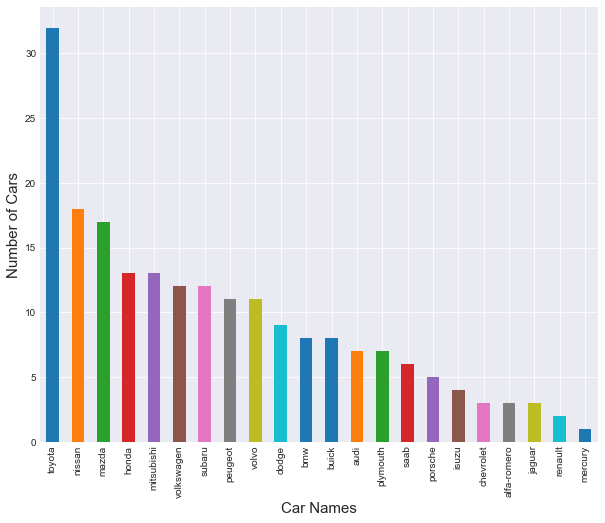

In [19]:
plt.figure(figsize=(10,8))
car_df['CarName'].value_counts().plot(kind='bar')
plt.xlabel("Car Names",fontsize = '15')
plt.ylabel("Number of Cars",fontsize = '15')
plt.show()

#### Toyota is comparatively more favorable car and mercury is least favourable car

### Derived Metrics 

In [20]:
car_df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

### From the above distribution it is clearly seen that there are 3 ranges of cars i.e from 5000-10000,10000-20000 and 20000-46000

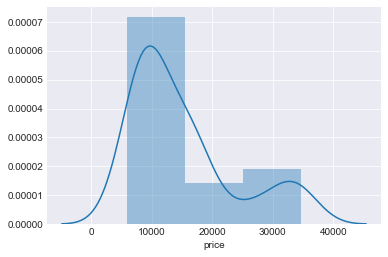

In [21]:
sb.distplot(car_df.groupby('CarName')['price'].mean().sort_values(ascending=False),bins=3)

In [22]:
#create a function to check prices of the car and group into different categories
def func(x):
    if x>=5000 and x<=10000:
        return "Low"
    elif x>=10001 and x<=20000:
        return "Medium"
    elif x>=20001 and x<=46000:
        return "High"

In [23]:
#apply func on price column to derive new column
car_df['car_category']=car_df['price'].apply(func)

In [24]:
#check header
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Medium
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Medium
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Medium


In [25]:
#checking price correlation with numerical variables
cor=car_df[num_col].corr().round(2)
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68
carwidth,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,0.59,0.49,0.28,1.00,0.30,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84
enginesize,0.57,0.68,0.74,0.07,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,0.49,0.61,0.56,0.17,0.65,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,0.16,0.13,0.18,-0.06,0.17,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,0.08
compressionratio,0.25,0.16,0.18,0.26,0.15,0.03,0.01,0.19,1.00,-0.20,-0.44,0.32,0.27,0.07
horsepower,0.35,0.55,0.64,-0.11,0.75,0.81,0.57,0.08,-0.20,1.00,0.13,-0.80,-0.77,0.81


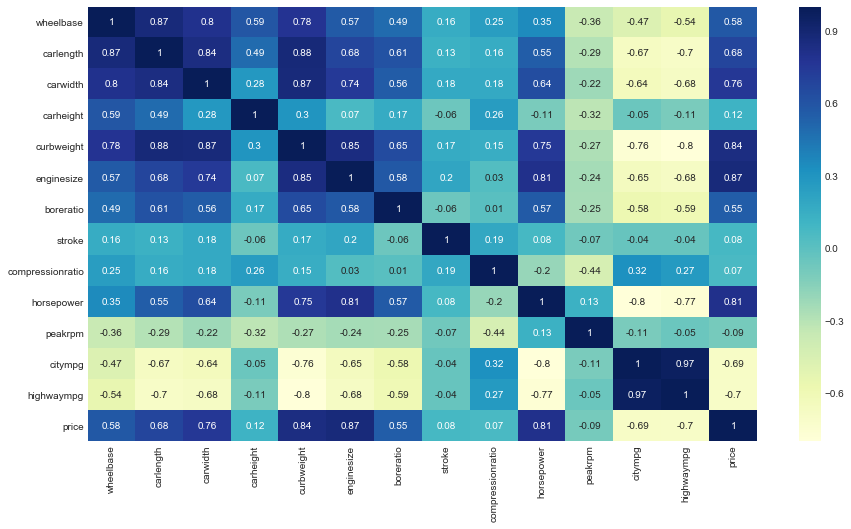

In [26]:
plt.figure(figsize=(15,8))
sb.heatmap(cor,annot=True,cmap='YlGnBu')

### correlation matrix used to extract highly correlated numerical columns w.r.t target columns

#### After Visualization there are some significant variables w.r.t to price (which directly impact price column)

In [27]:
#extract all the necessary columns
rem_var = ['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio',
           'horsepower','citympg','highwaympg','fueltype','aspiration','carbody','drivewheel','enginelocation',
           'cylindernumber','fuelsystem','enginetype','car_category']
car_df=car_df[rem_var]

In [28]:
car_df.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype,aspiration,carbody,drivewheel,enginelocation,cylindernumber,fuelsystem,enginetype,car_category
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,four,mpfi,dohc,Medium
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,four,mpfi,dohc,Medium
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,gas,std,hatchback,rwd,front,six,mpfi,ohcv,Medium
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,gas,std,sedan,fwd,front,four,mpfi,ohc,Medium
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,gas,std,sedan,4wd,front,five,mpfi,ohc,Medium


### Dummy Variables

In [29]:
#create dummy variables
cat_var = ['fueltype','aspiration','carbody','drivewheel','enginelocation',
          'cylindernumber','fuelsystem','enginetype','car_category']
dummies=pd.get_dummies(data=car_df[cat_var],drop_first=True)

In [30]:
#concat dummy variables with dataframe
car_df=pd.concat([car_df,dummies],axis=1)
car_df.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,car_category_Low,car_category_Medium
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,0,0,0,0,0,0,0,0,0,1
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,0,0,0,0,0,0,0,0,0,1
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,...,0,0,0,0,0,0,1,0,0,1
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,...,0,0,0,0,1,0,0,0,0,1
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,...,0,0,0,0,1,0,0,0,0,1


In [31]:
#drop columns which are used in dummy variables
car_df=car_df.drop(cat_var,axis=1)

In [32]:
car_df.shape

(205, 40)

In [33]:
#check empty data 
car_df.isnull().sum()

price                    0
wheelbase                0
carlength                0
carwidth                 0
curbweight               0
enginesize               0
boreratio                0
horsepower               0
citympg                  0
highwaympg               0
fueltype_gas             0
aspiration_turbo         0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_fwd           0
drivewheel_rwd           0
enginelocation_rear      0
cylindernumber_five      0
cylindernumber_four      0
cylindernumber_six       0
cylindernumber_three     0
cylindernumber_twelve    0
cylindernumber_two       0
fuelsystem_2bbl          0
fuelsystem_4bbl          0
fuelsystem_idi           0
fuelsystem_mfi           0
fuelsystem_mpfi          0
fuelsystem_spdi          0
fuelsystem_spfi          0
enginetype_dohcv         0
enginetype_l             0
enginetype_ohc           0
enginetype_ohcf          0
enginetype_ohcv          0
e

##  Splitting the Data into Training and Testing Sets

In [34]:
df_train,df_test=train_test_split(car_df,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 40)
(62, 40)


In [35]:
scaler = StandardScaler()
num_var = ['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio',
           'horsepower','citympg','highwaympg']
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [36]:
df_train.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,car_category_Low,car_category_Medium
122,-0.700201,-0.811836,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,0.839773,1.025419,...,0,0,0,0,1,0,0,0,1,0
125,1.151929,-0.677177,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,-0.957048,-0.557490,...,0,0,0,0,1,0,0,0,0,0
166,-0.452248,-0.677177,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,0.091098,-0.269688,...,0,0,0,0,0,0,0,0,1,0
1,0.442646,-1.670284,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,...,0,0,0,0,0,0,0,0,0,1
199,0.757569,0.972390,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.256518,-1.276993,...,0,0,0,0,1,0,0,0,0,1


In [37]:
df_train.describe()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,car_category_Low,car_category_Medium
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.925422e-16,1.538785e-15,2.003060e-16,-4.093074e-15,-1.894367e-16,-4.308908e-17,-1.059758e-15,1.195625e-16,2.655219e-16,1.599342e-16,...,0.041958,0.0,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.496503,0.363636
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.201198,0.0,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.501745,0.482737
min,-1.020394e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-1.937401e+00,-1.566427e+00,-2.412359e+00,-1.378157e+00,-1.855458e+00,-1.996497e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.072706e-01,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.711028e-01,-6.847340e-01,-9.320600e-01,-8.223718e-01,-9.570476e-01,-8.452912e-01,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.674114e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,-2.478347e-01,-3.663447e-01,9.948427e-03,-2.160603e-01,-5.863749e-02,1.811338e-02,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.381475e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.203955e-01,3.928914e-01,8.942829e-01,3.397252e-01,8.397726e-01,8.095676e-01,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.632362e+00,2.874442e+00,2.324616e+00,2.927846e+00,2.812547e+00,4.923816e+00,2.432256e+00,4.684957e+00,3.535003e+00,3.327831e+00,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [38]:
y_train=df_train.pop('price')

In [39]:
X_train = df_train

In [40]:
X_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,...,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,car_category_Low,car_category_Medium
122,-0.811836,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,0.839773,1.025419,1,...,0,0,0,0,1,0,0,0,1,0
125,-0.677177,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,-0.957048,-0.557490,1,...,0,0,0,0,1,0,0,0,0,0
166,-0.677177,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,0.091098,-0.269688,1,...,0,0,0,0,0,0,0,0,1,0
1,-1.670284,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,1,...,0,0,0,0,0,0,0,0,0,1
199,0.972390,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,-1.256518,-1.276993,1,...,0,0,0,0,1,0,0,0,0,1


In [41]:
y_train.head()

122   -0.700201
125    1.151929
166   -0.452248
1      0.442646
199    0.757569
Name: price, dtype: float64

## Building a  model with RFE 
#### There are large amount of columns so building a model via Forward Selection or Backward Elimination will become a tedious task so we go with recursive feature elimination first then check its pvalues and VIF's

In [42]:
#fit a linear regression model in train dataset
lm =LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [43]:
#check ranking
rfe.ranking_

array([19, 15, 22,  1,  9, 11,  1, 21, 12,  1,  1,  1,  1,  1,  1, 14, 17,
        1,  3,  2,  1, 18,  1, 16, 20, 10,  1, 24, 23,  7, 25,  1,  4,  5,
        6,  8, 13,  1,  1])

In [44]:
#check the columns which get highest ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 19),
 ('carlength', False, 15),
 ('carwidth', False, 22),
 ('curbweight', True, 1),
 ('enginesize', False, 9),
 ('boreratio', False, 11),
 ('horsepower', True, 1),
 ('citympg', False, 21),
 ('highwaympg', False, 12),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', True, 1),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 14),
 ('drivewheel_rwd', False, 17),
 ('enginelocation_rear', True, 1),
 ('cylindernumber_five', False, 3),
 ('cylindernumber_four', False, 2),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 18),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 16),
 ('fuelsystem_2bbl', False, 20),
 ('fuelsystem_4bbl', False, 10),
 ('fuelsystem_idi', True, 1),
 ('fuelsystem_mfi', False, 24),
 ('fuelsystem_mpfi', False, 23),
 ('fuelsystem_spdi', False, 7),
 ('fuelsystem_spfi', False, 25),
 ('enginetype_dohcv', True, 1),
 ('en

In [45]:
#check the high ranking columns
cols = X_train.columns[rfe.support_]
cols

Index(['curbweight', 'horsepower', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'cylindernumber_six',
       'cylindernumber_twelve', 'fuelsystem_idi', 'enginetype_dohcv',
       'car_category_Low', 'car_category_Medium'],
      dtype='object')

In [46]:
#columns which do not get highest ranking in RFE
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carwidth', 'enginesize', 'boreratio',
       'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor'],
      dtype='object')

### Building model using statsmodel, for the detailed statictics

In [47]:
X_train_rfe=X_train[cols]

# Add a constant
X_train_rfe=sm.add_constant(X_train_rfe)

# Create a first fitted model
rfe_lm = sm.OLS(y_train,X_train_rfe).fit()

#check the summary
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     152.8
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.22e-72
Time:                        16:47:51   Log-Likelihood:                 2.5866
No. Observations:                 143   AIC:                             24.83
Df Residuals:                     128   BIC:                             69.27
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.12

In [48]:
X1=X_train_rfe.drop('const',axis=1)

In [49]:
#check VIF's
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,fueltype_gas,43.99
1,horsepower,12.84
6,carbody_sedan,10.45
5,carbody_hatchback,9.81
13,car_category_Low,8.30
0,curbweight,8.10
11,fuelsystem_idi,7.15
7,carbody_wagon,5.85
14,car_category_Medium,4.02
9,cylindernumber_six,2.58


### We could have
- High P-Value and High VIF: Drop it
- High-Low:
  - High p-values and low VIF - drop these first
  - Low p-values and High VIF - drop these after the ones above
    
- Low P-Value and Low VIF:Keep it 

In [50]:
X_train_rfe2=X_train[cols]

### Dropping the variable and updating the model

In [51]:
X_train_rfe2=X_train_rfe2.drop('carbody_sedan',axis=1)

In [52]:
# Create a second model
X_train_rfe2=sm.add_constant(X_train_rfe2)
rfe_lm = sm.OLS(y_train,X_train_rfe2).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     163.3
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.31e-73
Time:                        16:47:51   Log-Likelihood:                 1.5631
No. Observations:                 143   AIC:                             24.87
Df Residuals:                     129   BIC:                             66.35
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.02

In [53]:
X2=X_train_rfe2.drop('const',axis=1)

In [54]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,fueltype_gas,17.88
1,horsepower,12.67
12,car_category_Low,8.15
0,curbweight,8.04
10,fuelsystem_idi,4.61
13,car_category_Medium,4.00
11,enginetype_dohcv,2.47
8,cylindernumber_six,2.45
3,aspiration_turbo,1.96
7,enginelocation_rear,1.90


In [55]:
X_train_rfe3=X2

In [56]:
#drop another variable high pvalue
X_train_rfe3=X_train_rfe3.drop('carbody_hardtop',axis=1)

In [57]:
# Create a third fitted model
X_train_rfe3=sm.add_constant(X_train_rfe3)
rfe_lm = sm.OLS(y_train,X_train_rfe3).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     177.0
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.62e-74
Time:                        16:47:52   Log-Likelihood:                 1.0813
No. Observations:                 143   AIC:                             23.84
Df Residuals:                     130   BIC:                             62.35
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.02

In [58]:
X3=X_train_rfe3.drop('const',axis=1)

In [59]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values,i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,fueltype_gas,17.82
1,horsepower,12.66
11,car_category_Low,8.15
0,curbweight,8.03
9,fuelsystem_idi,4.61
12,car_category_Medium,4.00
10,enginetype_dohcv,2.47
7,cylindernumber_six,2.44
3,aspiration_turbo,1.96
8,cylindernumber_twelve,1.86


In [60]:
#high pvalues
X_train_rfe4=X3

In [61]:
#drop another variable because of high pvalue
X_train_rfe4=X_train_rfe4.drop('enginelocation_rear',axis=1)

In [62]:
# Create a fourth fitted model
X_train_rfe4=sm.add_constant(X_train_rfe4)
rfe_lm = sm.OLS(y_train,X_train_rfe4).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.05e-75
Time:                        16:47:52   Log-Likelihood:                0.52193
No. Observations:                 143   AIC:                             22.96
Df Residuals:                     131   BIC:                             58.51
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.05

In [63]:
X4=X_train_rfe4.drop('const',axis=1)

In [64]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values,i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,fueltype_gas,16.82
1,horsepower,10.00
10,car_category_Low,7.97
0,curbweight,6.53
8,fuelsystem_idi,3.87
11,car_category_Medium,3.77
6,cylindernumber_six,2.40
9,enginetype_dohcv,2.18
3,aspiration_turbo,1.86
7,cylindernumber_twelve,1.72


In [65]:
X_train_rfe5=X4

In [66]:
#Drop another variable high pvalues
X_train_rfe5=X_train_rfe5.drop('carbody_wagon',axis=1)

In [67]:
# Create a fifth fitted model
X_train_rfe5=sm.add_constant(X_train_rfe5)
rfe_lm = sm.OLS(y_train,X_train_rfe5).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.94e-76
Time:                        16:47:53   Log-Likelihood:               -0.20017
No. Observations:                 143   AIC:                             22.40
Df Residuals:                     132   BIC:                             54.99
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.06

In [68]:
X5=X_train_rfe5.drop('const',axis=1)

In [69]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values,i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,fueltype_gas,16.65
1,horsepower,9.36
9,car_category_Low,7.56
0,curbweight,5.64
7,fuelsystem_idi,3.65
10,car_category_Medium,3.54
5,cylindernumber_six,2.37
8,enginetype_dohcv,2.10
3,aspiration_turbo,1.84
6,cylindernumber_twelve,1.71


In [70]:
X_train_rfe6=X5

In [78]:
#Drop another variable with high pvalue
X_train_rfe6=X_train_rfe6.drop('carbody_hatchback',axis=1)

In [79]:
# Create a sixth fitted model
X_train_rfe6=sm.add_constant(X_train_rfe6)
rfe_lm = sm.OLS(y_train,X_train_rfe6).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.43e-76
Time:                        16:50:31   Log-Likelihood:                -2.0884
No. Observations:                 143   AIC:                             24.18
Df Residuals:                     133   BIC:                             53.81
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.05

In [80]:
X6=X_train_rfe6.drop('const',axis=1)

In [81]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values,i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,fueltype_gas,16.52
1,horsepower,8.92
8,car_category_Low,7.49
0,curbweight,5.16
6,fuelsystem_idi,3.60
9,car_category_Medium,3.51
4,cylindernumber_six,2.37
7,enginetype_dohcv,2.10
3,aspiration_turbo,1.84
5,cylindernumber_twelve,1.70


In [83]:
X_train_rfe7=X6

In [84]:
#Drop another variable with high VIF
X_train_rfe7=X_train_rfe7.drop('fueltype_gas',axis=1)

In [85]:
# Create a seventh fitted model
X_train_rfe7=sm.add_constant(X_train_rfe7)
rfe_lm = sm.OLS(y_train,X_train_rfe7).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.43e-76
Time:                        16:51:38   Log-Likelihood:                -2.0884
No. Observations:                 143   AIC:                             24.18
Df Residuals:                     133   BIC:                             53.81
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.33

In [86]:
X7=X_train_rfe7.drop('const',axis=1)

In [87]:
vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values,i) for i in range(X7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,horsepower,8.89
0,curbweight,4.45
7,car_category_Low,2.65
3,cylindernumber_six,2.48
5,fuelsystem_idi,2.40
2,aspiration_turbo,2.23
6,enginetype_dohcv,2.08
4,cylindernumber_twelve,1.70
8,car_category_Medium,1.28


In [88]:
X_train_rfe8=X7

In [89]:
#Drop another variable with high VIF
X_train_rfe8=X_train_rfe8.drop('horsepower',axis=1)

In [90]:
# Create a eigth fitted model
X_train_rfe8=sm.add_constant(X_train_rfe8)
rfe_lm = sm.OLS(y_train,X_train_rfe8).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.05e-65
Time:                        16:52:52   Log-Likelihood:                -32.615
No. Observations:                 143   AIC:                             83.23
Df Residuals:                     134   BIC:                             109.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.37

In [91]:
X8=X_train_rfe8.drop('const',axis=1)

In [92]:
vif = pd.DataFrame()
vif['Features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values,i) for i in range(X8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,curbweight,3.02
6,car_category_Low,2.06
1,aspiration_turbo,1.66
2,cylindernumber_six,1.53
4,fuelsystem_idi,1.40
7,car_category_Medium,1.28
3,cylindernumber_twelve,1.14
5,enginetype_dohcv,1.05


In [94]:
X_train_rfe9=X8

In [95]:
X_train_rfe9=X_train_rfe9.drop('aspiration_turbo',axis=1)

In [96]:
# Create a ninth fitted model
X_train_rfe9=sm.add_constant(X_train_rfe9)
rfe_lm = sm.OLS(y_train,X_train_rfe9).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     189.0
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.64e-66
Time:                        16:57:03   Log-Likelihood:                -32.762
No. Observations:                 143   AIC:                             81.52
Df Residuals:                     135   BIC:                             105.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.36

In [97]:
X9=X_train_rfe9.drop('const',axis=1)

In [98]:
vif = pd.DataFrame()
vif['Features'] = X9.columns
vif['VIF'] = [variance_inflation_factor(X9.values,i) for i in range(X9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,curbweight,2.67
5,car_category_Low,1.83
1,cylindernumber_six,1.47
3,fuelsystem_idi,1.26
6,car_category_Medium,1.20
2,cylindernumber_twelve,1.13
4,enginetype_dohcv,1.04


In [99]:
X_train_rfe10=X9

In [100]:
#drop high pvalues
X_train_rfe10=X_train_rfe10.drop('cylindernumber_six',axis=1)

In [101]:
# Create a tenth fitted model
X_train_rfe10=sm.add_constant(X_train_rfe10)
rfe_lm = sm.OLS(y_train,X_train_rfe10).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     220.3
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.75e-67
Time:                        16:58:38   Log-Likelihood:                -33.298
No. Observations:                 143   AIC:                             80.60
Df Residuals:                     136   BIC:                             101.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.41

In [102]:
X10=X_train_rfe10.drop('const',axis=1)

In [103]:
vif = pd.DataFrame()
vif['Features'] = X10.columns
vif['VIF'] = [variance_inflation_factor(X10.values,i) for i in range(X10.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,curbweight,1.97
4,car_category_Low,1.62
2,fuelsystem_idi,1.21
5,car_category_Medium,1.17
1,cylindernumber_twelve,1.09
3,enginetype_dohcv,1.03


In [104]:
X_train_rfe11=X10

In [105]:
#Drop another variable high pvalue
X_train_rfe11=X_train_rfe11.drop('enginetype_dohcv',axis=1)

In [106]:
## Create a eleventh fitted model
X_train_rfe11=sm.add_constant(X_train_rfe11)
rfe_lm = sm.OLS(y_train,X_train_rfe11).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     264.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.59e-68
Time:                        17:00:55   Log-Likelihood:                -33.763
No. Observations:                 143   AIC:                             79.53
Df Residuals:                     137   BIC:                             97.30
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.42

In [107]:
X11=X_train_rfe11.drop('const',axis=1)

In [108]:
vif = pd.DataFrame()
vif['Features'] = X11.columns
vif['VIF'] = [variance_inflation_factor(X11.values,i) for i in range(X11.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,curbweight,1.91
3,car_category_Low,1.60
2,fuelsystem_idi,1.21
4,car_category_Medium,1.16
1,cylindernumber_twelve,1.09


In [110]:
X_train_rfe12=X11

In [111]:
#Drop recursively
X_train_rfe12=X_train_rfe12.drop('cylindernumber_twelve',axis=1)

In [112]:
X_train_rfe12=sm.add_constant(X_train_rfe12)
rfe_lm = sm.OLS(y_train,X_train_rfe12).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     328.5
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.89e-69
Time:                        17:02:01   Log-Likelihood:                -34.631
No. Observations:                 143   AIC:                             79.26
Df Residuals:                     138   BIC:                             94.08
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.4340    

In [113]:
X12=X_train_rfe12.drop('const',axis=1)

In [114]:
vif = pd.DataFrame()
vif['Features'] = X12.columns
vif['VIF'] = [variance_inflation_factor(X12.values,i) for i in range(X12.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,curbweight,1.75
2,car_category_Low,1.55
1,fuelsystem_idi,1.20
3,car_category_Medium,1.16


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [115]:
y_train_pred = rfe_lm.predict(X_train_rfe12)

In [116]:
y_train_pred.head()

122   -0.645628
125    1.624725
166   -0.558478
1     -0.000621
199    0.486299
dtype: float64

In [117]:
res = y_train - y_train_pred

Text(0.5,0,'Errors')

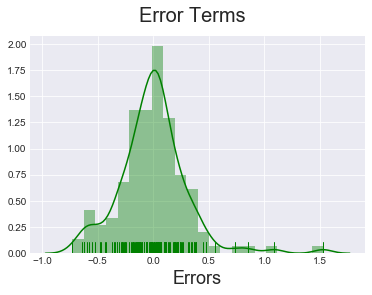

In [118]:
fig = plt.figure()
sb.distplot(res,rug=True,color='green')
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

##  Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 12th model.

In [119]:
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,car_category_Low,car_category_Medium
160,-0.683619,-0.475189,-0.566894,-0.652569,-0.820850,-0.660242,-0.451443,-0.822372,1.887918,2.320526,...,0,0,0,0,1,0,0,0,1,0
186,-0.586315,-0.205872,-0.136752,-0.154030,-0.487359,-0.390836,-0.451443,-0.443427,0.240833,0.449816,...,0,0,0,0,1,0,0,0,1,0
59,-0.541326,0.046613,0.349149,0.299187,-0.284685,-0.072447,0.317543,-0.468690,0.091098,0.162014,...,0,0,0,0,1,0,0,0,1,0
165,-0.483097,-0.677177,-0.375720,-0.833856,-0.505784,-0.660242,-0.259197,0.238673,0.091098,-0.269688,...,0,0,0,0,0,0,0,0,1,0
140,-0.700972,-0.879165,-1.283797,-0.924500,-0.551846,-0.415328,1.201877,-0.746583,0.091098,0.018113,...,0,0,0,0,0,1,0,0,1,0


#### Dividing into X_test and y_test

In [120]:
y_test=df_test.pop('price')
X_test = df_test

In [121]:
#add a constant in X_test
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,car_category_Low,car_category_Medium
160,1.0,-0.475189,-0.566894,-0.652569,-0.820850,-0.660242,-0.451443,-0.822372,1.887918,2.320526,...,0,0,0,0,1,0,0,0,1,0
186,1.0,-0.205872,-0.136752,-0.154030,-0.487359,-0.390836,-0.451443,-0.443427,0.240833,0.449816,...,0,0,0,0,1,0,0,0,1,0
59,1.0,0.046613,0.349149,0.299187,-0.284685,-0.072447,0.317543,-0.468690,0.091098,0.162014,...,0,0,0,0,1,0,0,0,1,0
165,1.0,-0.677177,-0.375720,-0.833856,-0.505784,-0.660242,-0.259197,0.238673,0.091098,-0.269688,...,0,0,0,0,0,0,0,0,1,0
140,1.0,-0.879165,-1.283797,-0.924500,-0.551846,-0.415328,1.201877,-0.746583,0.091098,0.018113,...,0,0,0,0,0,1,0,0,1,0


In [122]:
X_test_sm=X_test_sm[X_train_rfe12.columns]

In [123]:
X_test_sm.head()

,const,curbweight,fuelsystem_idi,car_category_Low,car_category_Medium
160,1.0,-0.820850,0,1,0
186,1.0,-0.487359,0,1,0
59,1.0,-0.284685,0,1,0
165,1.0,-0.505784,0,1,0
140,1.0,-0.551846,0,1,0


In [124]:
# Making predictions using the 16th model
y_test_pred = rfe_lm.predict(X_test_sm)
y_test_pred[:10]

160   -0.723184
186   -0.578467
59    -0.490518
165   -0.586462
140   -0.606451
64    -0.098965
198    0.396750
75     0.288812
172    0.340783
104    0.417538
dtype: float64

In [125]:
#calculate accuracy
r2_score(y_test,y_test_pred)

0.8605103124957385

In [126]:
res = y_test - y_test_pred

Text(0.5,0,'Errors')

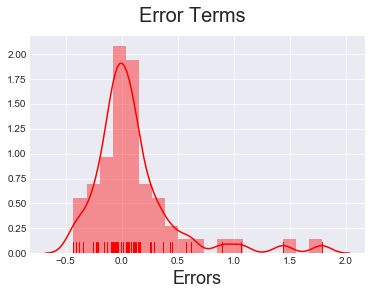

In [127]:
fig = plt.figure()
sb.distplot(res,rug=True,color='red')
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

##  Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

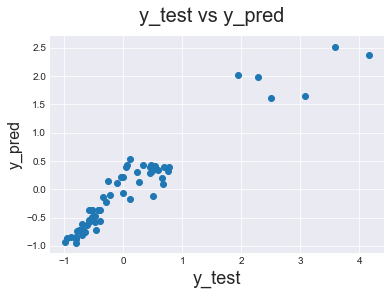

In [128]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    